In [12]:
import numpy as np
from util import *
from decentralized import plot_solve
import matplotlib.pyplot as plt

In [28]:
from decentralized import random_setup,pos_mask


In [29]:
n_agents = 3
n_states = 6
energy=10

In [32]:
x_dims = [n_states]*n_agents

In [37]:
pos_mask([6,6,6,6], 3)

array([ True,  True,  True, False, False, False,  True,  True,  True,
       False, False, False,  True,  True,  True, False, False, False,
        True,  True,  True, False, False, False])

In [ ]:
dec.posmaks

In [20]:
xf.T

array([[ 0.31 ,  1.42 ,  0.204,  0.   ,  0.   ,  0.   ,  1.94 ,  2.967,
        -0.558,  0.   ,  0.   ,  0.   , -2.25 , -4.387,  0.354,  0.   ,
         0.   ,  0.   ]])

In [21]:
x0.T

array([[ 0.799, -2.227,  1.087,  0.   ,  0.   ,  0.   , -2.402,  2.734,
         1.796,  0.   ,  0.   ,  0.   ,  1.603, -0.507, -2.883,  0.   ,
         0.   ,  0.   ]])

In [6]:
data= np.load('distributed_sim_data.npy')

In [8]:
data.shape

(46, 30)

In [9]:
plot_solve?

Signature: plot_solve(X, J, x_goal, x_dims=None, color_agents=False, n_d=2)
Docstring: Plot the resultant trajectory on plt.gcf()
File:      /mnt/c/Users/Randy666/Documents/projects/ICON_lab/decentralized/decentralized/util.py
Type:      function


In [10]:
x0,xf = paper_setup_5_quads()

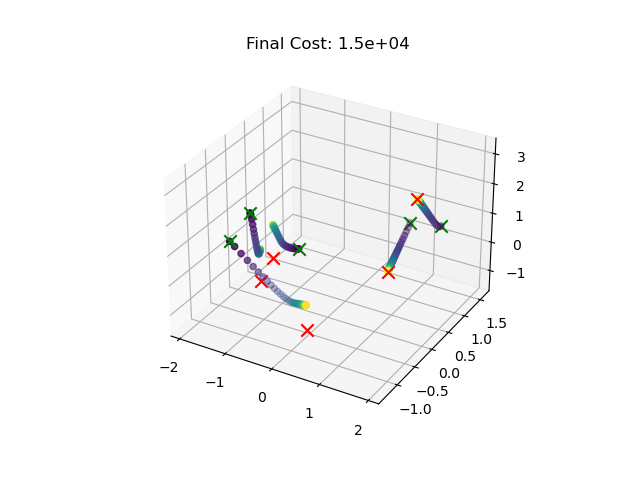

In [14]:
%matplotlib ipympl
plt.figure(dpi=100)
plot_solve(data,15011,xf,x_dims=[6,6,6,6,6],n_d=3)